# 4. Đặt câu hỏi và trả lời

In [46]:
#import các thứ viện cần thiết
import pandas as pd
import numpy as np
!pip install matplotlib-venn
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: D:\Program Files\Python311\python.exe -m pip install --upgrade pip


In [70]:
#đọc file csv
df = pd.read_csv('data/mxmh_survey_results_clean.csv')
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18,Spotify,5,Yes,Yes,Yes,Jazz,Yes,Yes,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18,YouTube Music,3,Yes,Yes,No,Video game music,Yes,Yes,66,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [71]:
metal_healths = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Lọc ra các cột liên quan đến tần suất nghe nhạc
frequency_columns = [col for col in df.columns if col.startswith('Frequency')]

# Tạo DataFrame mới chỉ chứa dữ liệu tần suất nghe nhạc
df_frequency = df[frequency_columns]
df_frequency

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently
1,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never
2,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely
3,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never
4,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never
654,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes
655,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely
656,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 1:  Phân tích những yếu tố tác động đến những người tham gia khảo sát khi các vấn đề về tình thần diễn ra thường xuyên hơn (> 5 ở thang 10)  </b></font>

<font color="red"><b>Câu hỏi có lợi ích gì:  </b></font> <font color="red">Việc phân tích những yếu tố tác động đến sức khỏe tinh thân giúp chúng ta có cái nhìn chi tiết hơn về vấn để tinh thần của mọi người. Nhìn nhận việc nghe nhạc tác động đến sức khỏe ở nhiều góc cạnh khác nhau, tìm ra những khác biệt của những người các triệu chứng về sức khỏe tinh thần, để kip thời phát hiện và chữa trị sớm nhất</font>

</div>


- Chúng ta xét những người có mức độ bệnh tâm lý nặng khi các chỉ số aniety, depression, insomnia, ocd , tức là những triệu chứng tâm lý diễn ra thường xuyên hơn.

In [72]:
# Lọc những người tham gia khảo sát có điểm trên 5 ở các trường Anxiety, Depression, Insomnia, OCD
custom_colormap = ['skyblue', 'lightgreen', 'sandybrown', 'salmon']
df_anxiety = df[df['Anxiety'] > 5]
df_depression = df[df['Depression'] > 5]
df_insomnia = df[df['Insomnia'] > 5]
df_ocd = df[df['OCD'] > 5]

In [73]:
# Tạo các set cho mỗi loại bệnh
set_anxiety = set(df_anxiety.index)
set_depression = set(df_depression.index)
set_insomnia = set(df_insomnia.index)
set_ocd = set(df_ocd.index)

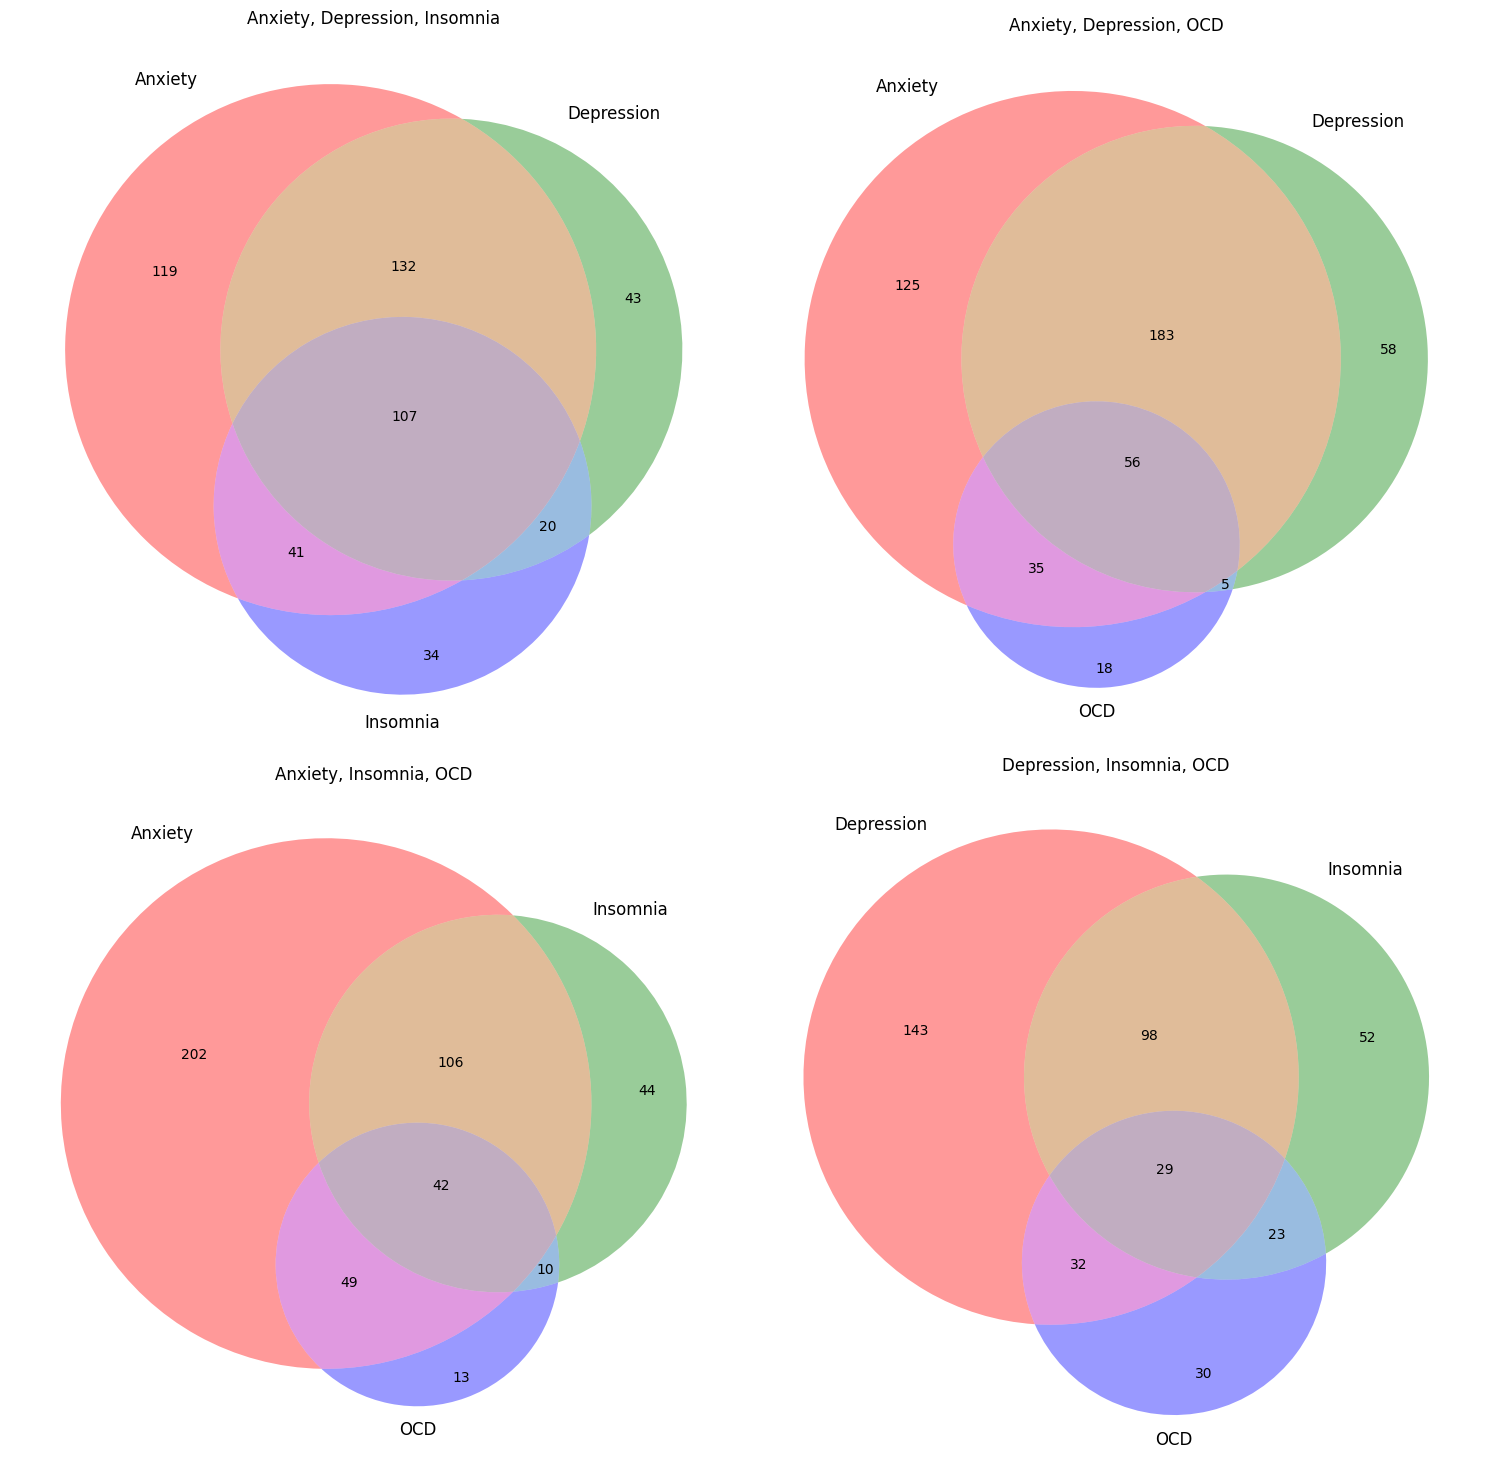

In [74]:
# Vẽ biểu đồ Venn để thấy sự giao nhau của các loại bệnh
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Biểu đồ Venn cho Anxiety, Depression, Insomnia
venn3([set_anxiety, set_depression, set_insomnia], ('Anxiety', 'Depression', 'Insomnia'), ax=axes[0, 0])
axes[0, 0].set_title('Anxiety, Depression, Insomnia')

# Biểu đồ Venn cho Anxiety, Depression, OCD
venn3([set_anxiety, set_depression, set_ocd], ('Anxiety', 'Depression', 'OCD'), ax=axes[0, 1])
axes[0, 1].set_title('Anxiety, Depression, OCD')

# Biểu đồ Venn cho Anxiety, Insomnia, OCD
venn3([set_anxiety, set_insomnia, set_ocd], ('Anxiety', 'Insomnia', 'OCD'), ax=axes[1, 0])
axes[1, 0].set_title('Anxiety, Insomnia, OCD')

# Biểu đồ Venn cho Depression, Insomnia, OCD
venn3([set_depression, set_insomnia, set_ocd], ('Depression', 'Insomnia', 'OCD'), ax=axes[1, 1])
axes[1, 1].set_title('Depression, Insomnia, OCD')

plt.tight_layout()
plt.show()


In [75]:
# Phân tích tỉ lệ một người có thể mắc nhiều vấn đề tinh thần cùng lúc
# Sửa lại cách tính toán các giá trị
four_issue = len(set_anxiety.intersection(set_depression, set_insomnia, set_ocd))

three_issue = len(set_anxiety.intersection(set_depression, set_insomnia)) + \
                        len(set_anxiety.intersection(set_depression, set_ocd)) + \
                        len(set_anxiety.intersection(set_insomnia, set_ocd)) + \
                        len(set_depression.intersection(set_insomnia, set_ocd)) - \
                        3 * four_issue

two_issue = len(set_anxiety.intersection(set_depression)) + \
                      len(set_anxiety.intersection(set_insomnia)) + \
                      len(set_anxiety.intersection(set_ocd)) + \
                      len(set_depression.intersection(set_insomnia)) + \
                      len(set_depression.intersection(set_ocd)) + \
                      len(set_insomnia.intersection(set_ocd)) - \
                      three_issue - 2 * four_issue
                      
one_issue = len(set_anxiety) + len(set_depression) + len(set_insomnia) + len(set_ocd) - \
                      two_issue - three_issue - four_issue
                      
total = len(df)

print(f'Tổng số người tham gia khảo sát là {total}. Trong đó có\n{one_issue} người chỉ mắc một vấn đề tinh thần,\n{two_issue} người mắc hai vấn đề tinh thần, \
      \n{three_issue} người mắc ba vấn đề tinh thần và \n{four_issue} người mắc bốn vấn đề tinh thần.')

Tổng số người tham gia khảo sát là 658. Trong đó có
325 người chỉ mắc một vấn đề tinh thần,
510 người mắc hai vấn đề tinh thần,       
156 người mắc ba vấn đề tinh thần và 
26 người mắc bốn vấn đề tinh thần.


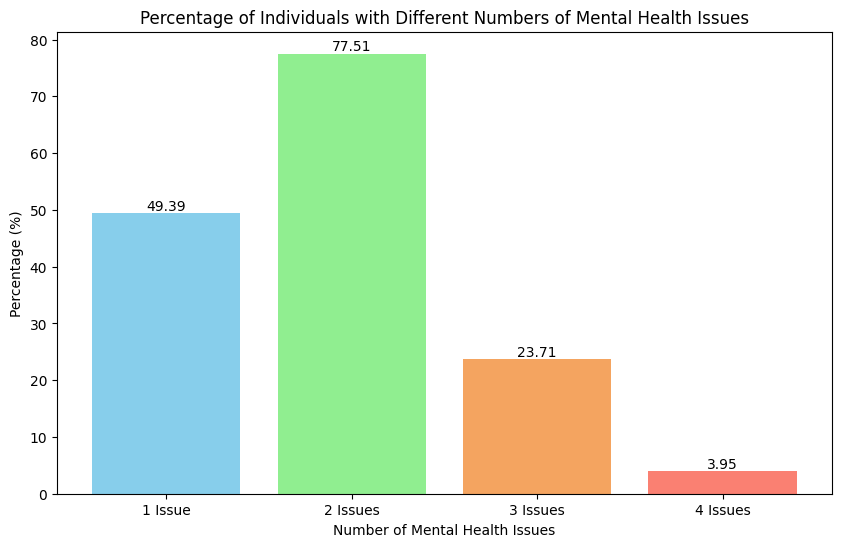

In [78]:
# Tính tỷ lệ phần trăm và vẽ biểu đồ
percent_four_issue = four_issue / total * 100
percent_three_issue = three_issue / total * 100
percent_two_issue = two_issue / total * 100
percent_one_issue = one_issue / total * 100


# Tạo biểu đồ cột
percentages = [percent_one_issue, percent_two_issue, percent_three_issue, percent_four_issue]
issues = ['1 Issue', '2 Issues', '3 Issues', '4 Issues']

plt.figure(figsize=(10, 6))
bars = plt.bar(issues, percentages, color= custom_colormap)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Number of Mental Health Issues')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Individuals with Different Numbers of Mental Health Issues')
plt.show()


- Sô giờ nghe nhạc của họ trung bình của họ là bao nhiêu, và có chệnh lệch gì so với những người còn lại không?

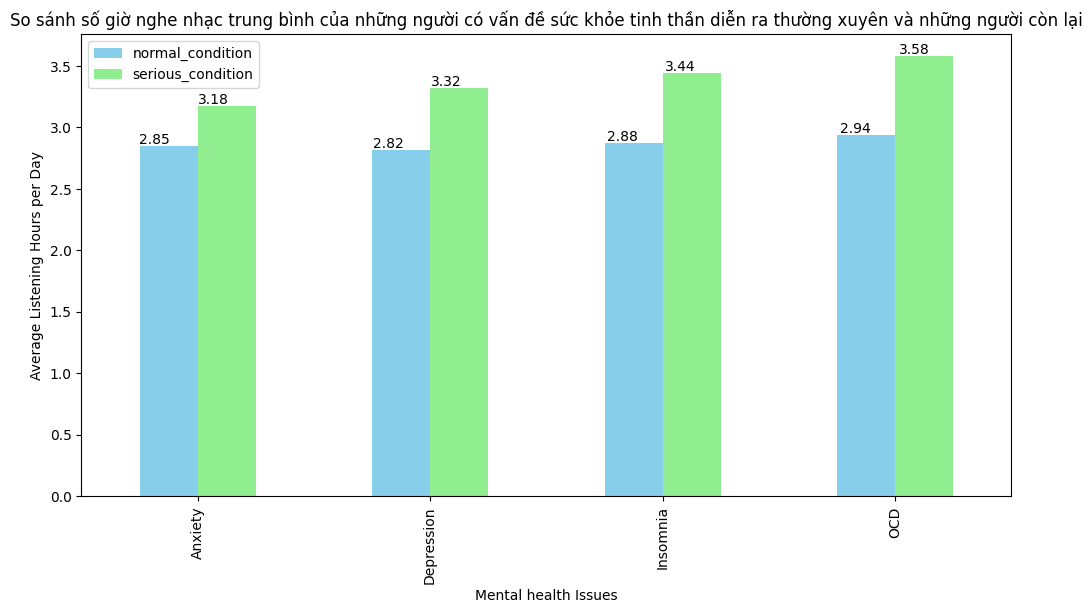

In [79]:
# Biểu đồ cột đôi để so sánh số giời nghe nhạc trung bình của những người này so với những người còn lại


# Tạo dictionary để lưu trữ kết quả
average_hours = {'normal_condition': [], 'serious_condition': []}

# Tính trung bình số giờ nghe nhạc cho mỗi nhóm và mỗi bệnh lý
for metal_health in metal_healths:
    df_serious = df[df[metal_health] > 5]
    df_normal = df[df[metal_health] <= 5]

    average_hours['normal_condition'].append(df_normal['Hours per day'].mean())
    average_hours['serious_condition'].append(df_serious['Hours per day'].mean())

# Chuyển dictionary thành DataFrame
average_hours_df = pd.DataFrame(average_hours, index=metal_healths)

# Vẽ biểu đồ
ax = average_hours_df.plot(kind='bar', figsize=(12, 6), color = custom_colormap)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Mental health Issues')
plt.ylabel('Average Listening Hours per Day')
plt.title('So sánh số giờ nghe nhạc trung bình của những người có vấn đề sức khỏe tinh thần diễn ra thường xuyên và những người còn lại')
plt.show()

- Có thể thấy trung bình số giờ nghe nhạc trong ngày của các nhóm người này cao hơn so với trung bình của tất cả mọi người nhưng không đáng kể
- Tiếp theo chúng ta tìm hiểu tần suất nghe nhạc của những người này ở từng thể loại nhạc

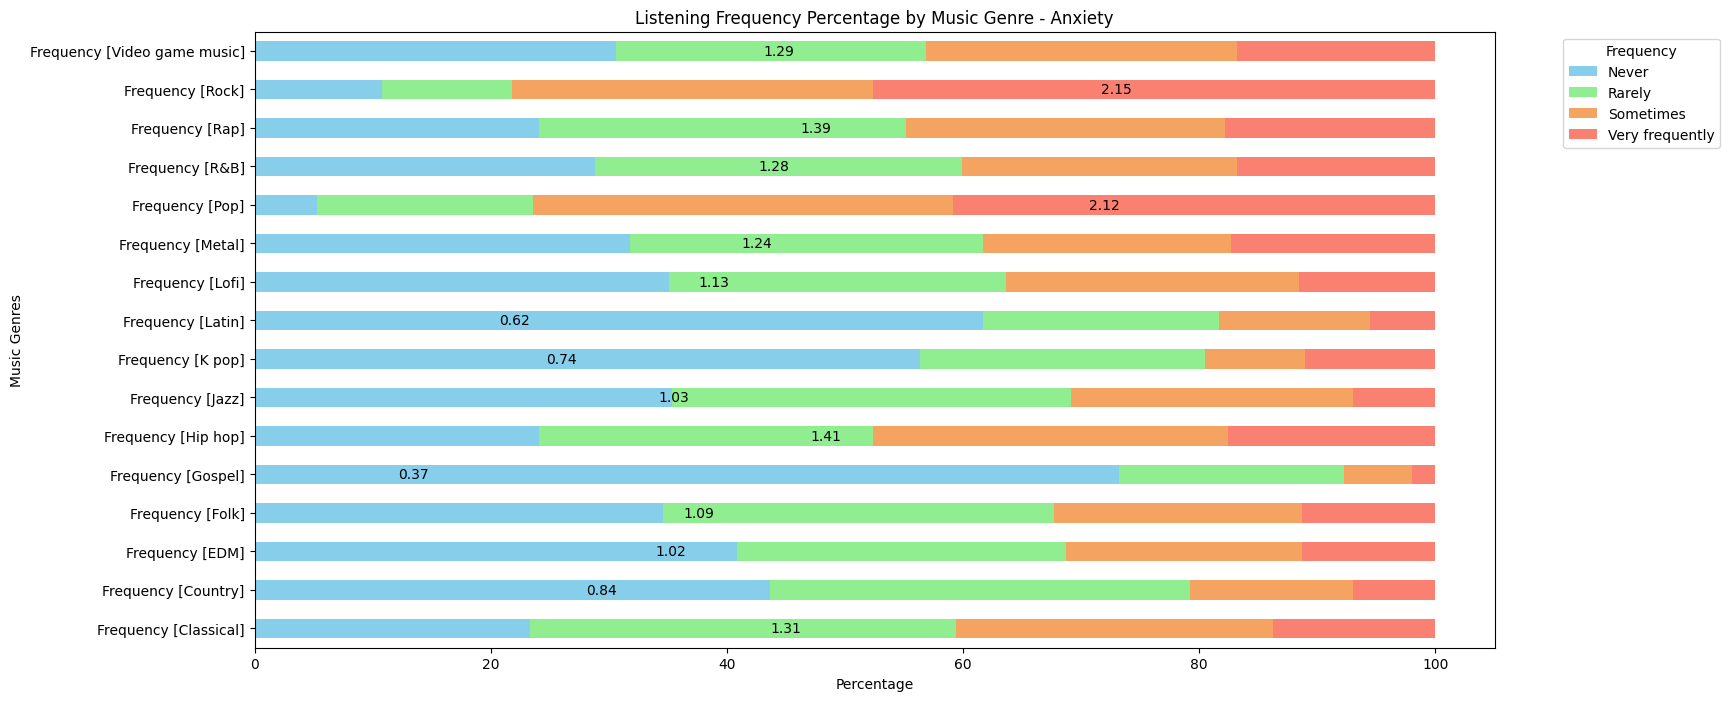

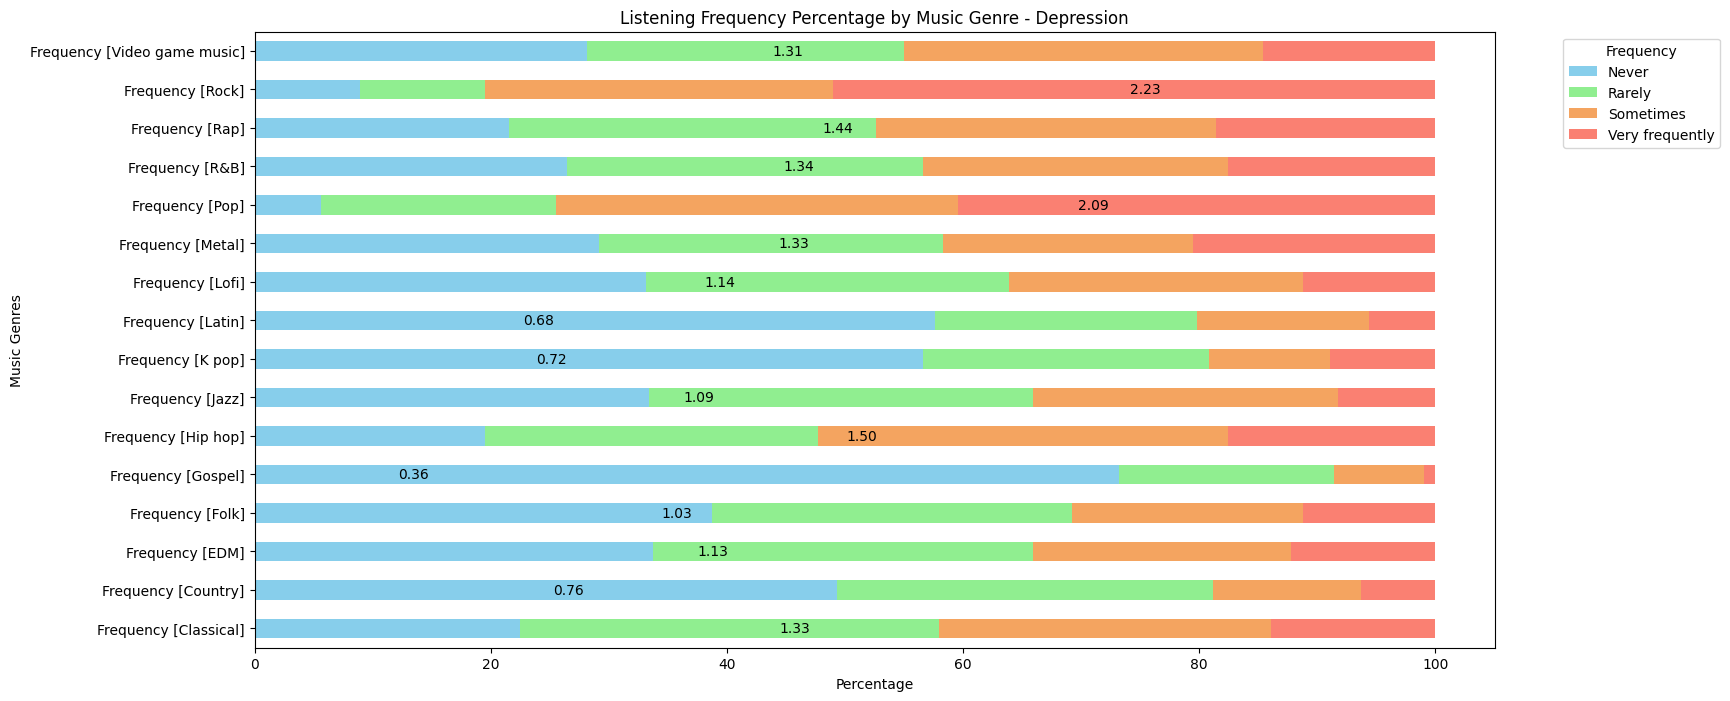

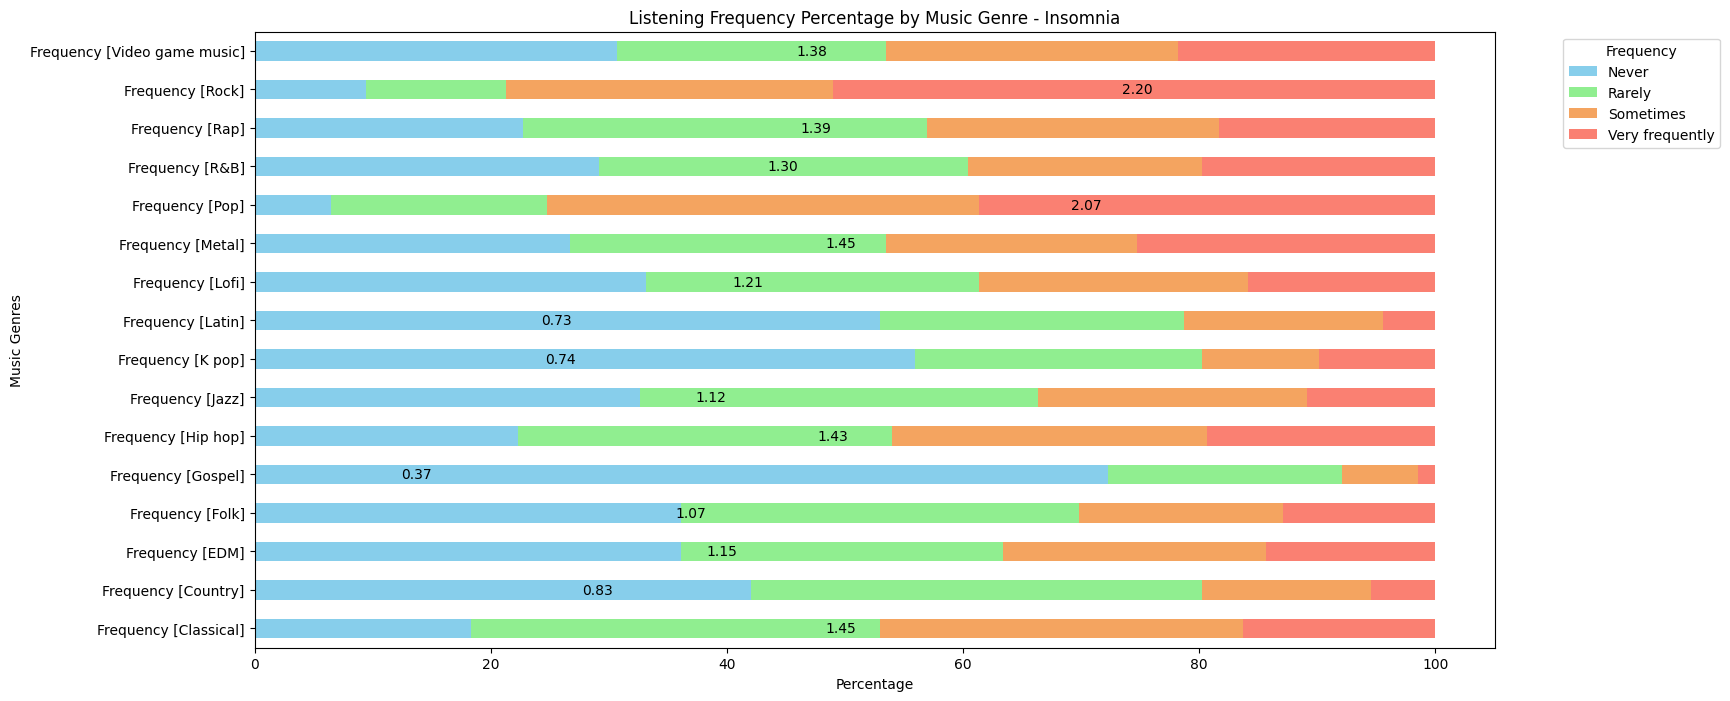

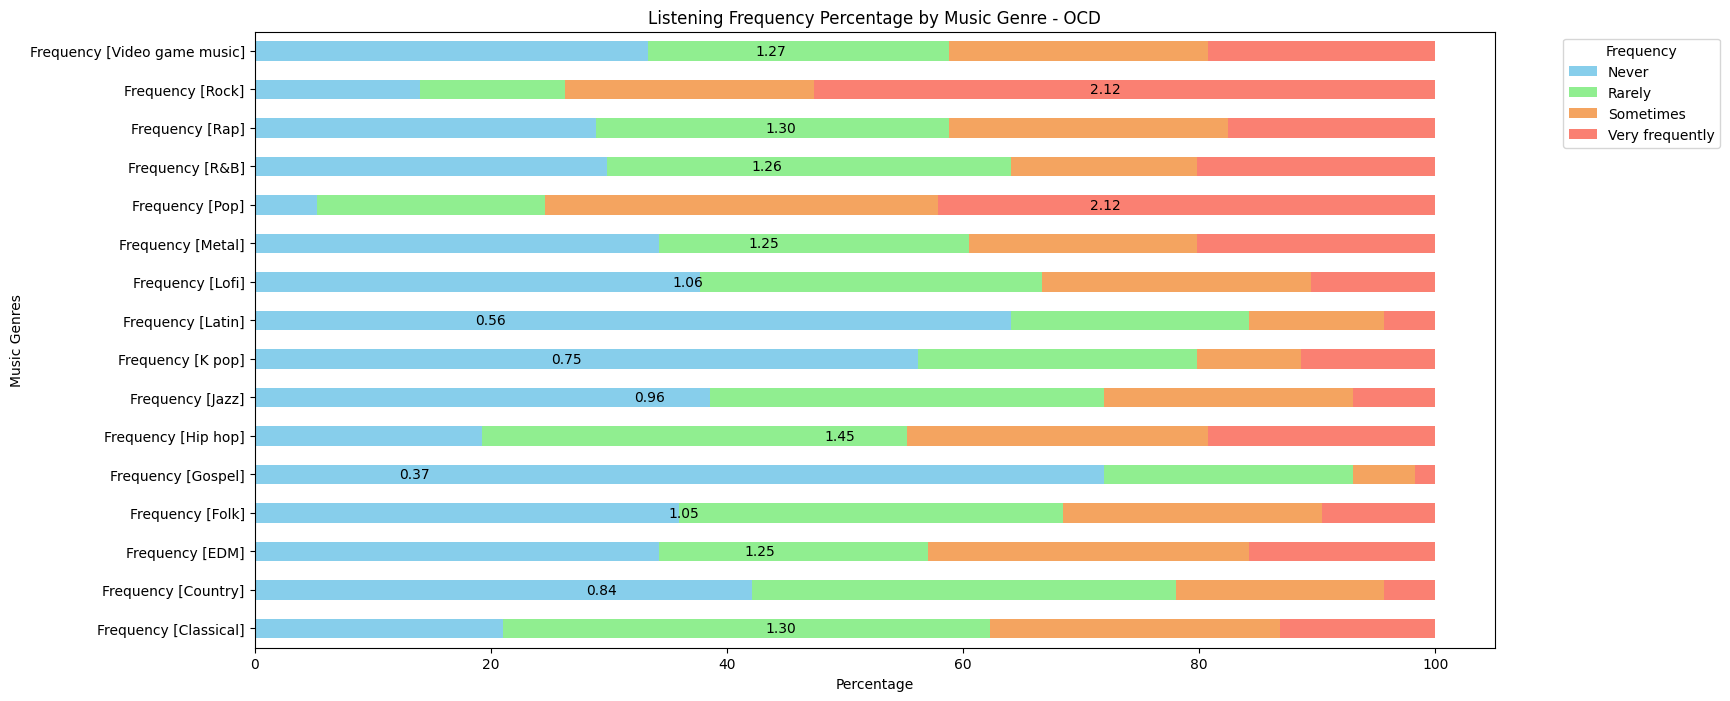

In [42]:
# Vẽ biểu đồ stack bar chart horizontal 100% để thể hiện % trăn của tần suất nghe nhạc['Nerver', 'Rarely', 'Sometimes', 'Very frequently'] theo từng thể loại nhạc



# Tạo một hàm để tính tỷ lệ phần trăm tần suất nghe nhạc cho mỗi thể loại
def calculate_frequency_percentages(df):
    frequency_counts = df[frequency_columns].apply(pd.Series.value_counts).fillna(0)
    frequency_percentages = frequency_counts.div(frequency_counts.sum()).multiply(100)
    return frequency_percentages

# Tính tỷ lệ phần trăm cho mỗi loại bệnh
percentages_anxiety = calculate_frequency_percentages(df_anxiety)
percentages_depression = calculate_frequency_percentages(df_depression)
percentages_insomnia = calculate_frequency_percentages(df_insomnia)
percentages_ocd = calculate_frequency_percentages(df_ocd)


# Mapping giá trị tần suất thành số
frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}

# Áp dụng mapping cho DataFrame
df_mapped = df.copy()
for col in frequency_columns:
    df_mapped[col] = df_mapped[col].map(frequency_mapping)

# Tính trung bình cho từng loại bệnh
average_anxiety = df_mapped.loc[df['Anxiety'] > 5, frequency_columns].mean()
average_depression = df_mapped.loc[df['Depression'] > 5, frequency_columns].mean()
average_insomnia = df_mapped.loc[df['Insomnia'] > 5, frequency_columns].mean()
average_ocd = df_mapped.loc[df['OCD'] > 5, frequency_columns].mean()


# Tạo biểu đồ với trung bình số được hiển thị bên cạnh
def plot_frequency_percentages(percentages, averages, title, colors=custom_colormap):
    fig, ax = plt.subplots(figsize=(16, 8))

    # Vẽ stacked bar chart
    percentages.T.plot(kind='barh', stacked=True, ax=ax, color=colors)

    # Thêm các giá trị trung bình
    for i, genre in enumerate(averages.index):
        ax.text(averages[genre] * 100 / 3, i, f'{averages[genre]:.2f}', va='center')

    ax.set_xlabel('Percentage')
    ax.set_ylabel('Music Genres')
    ax.set_title(title)
    plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    
plot_frequency_percentages(percentages_anxiety,average_anxiety, 'Listening Frequency Percentage by Music Genre - Anxiety')
plot_frequency_percentages(percentages_depression,average_depression, 'Listening Frequency Percentage by Music Genre - Depression')
plot_frequency_percentages(percentages_insomnia,average_insomnia, 'Listening Frequency Percentage by Music Genre - Insomnia')
plot_frequency_percentages(percentages_ocd, average_ocd,'Listening Frequency Percentage by Music Genre - OCD')


- Việc nghe nhạc như thế này có giúp cải thiện tinh thần của họ không?

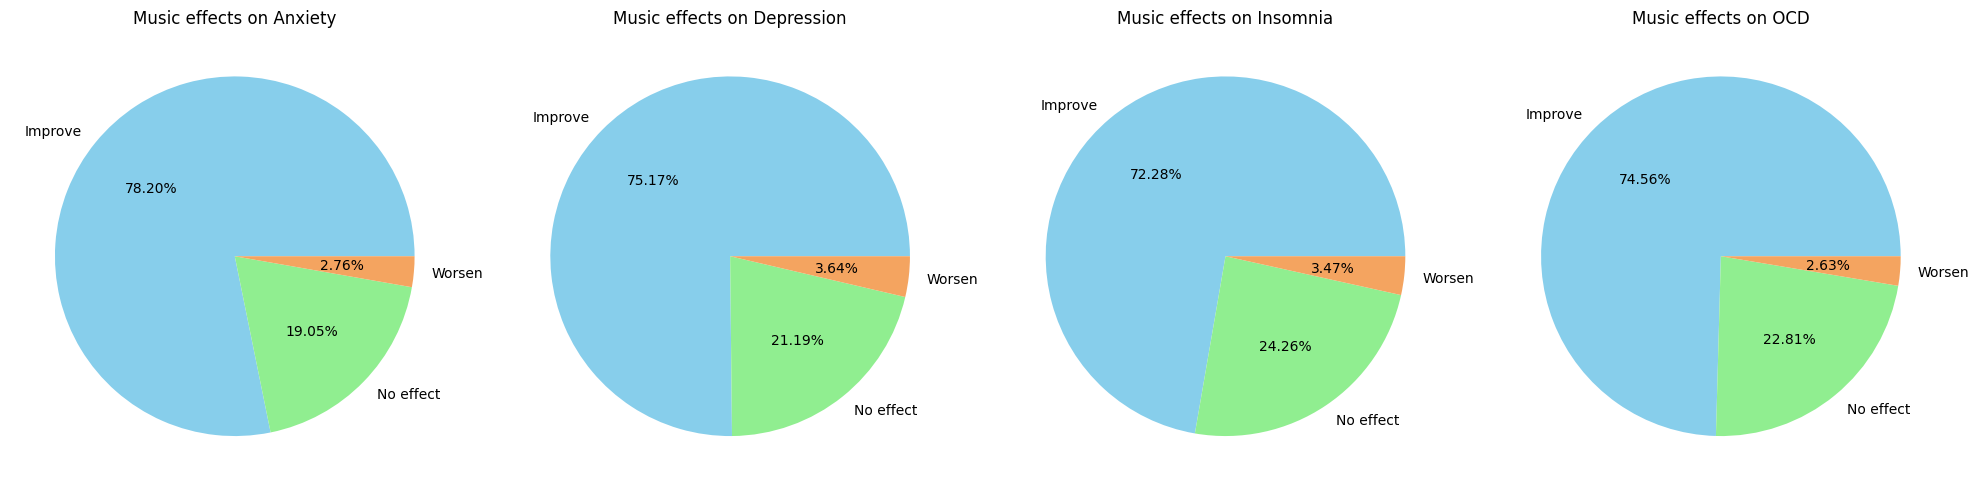

In [43]:
df_axiety_effect = df_anxiety['Music effects'].value_counts()
df_depression_effect = df_depression['Music effects'].value_counts()
df_insomnia_effect = df_insomnia['Music effects'].value_counts()
df_ocd_effect = df_ocd['Music effects'].value_counts()


fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 hàng, 4 cột

# Biểu đồ tròn cho Anxiety
df_axiety_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[0], title='Music effects on Anxiety', colors=custom_colormap)
axes[0].set_ylabel('')

# Biểu đồ tròn cho Depression
df_depression_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[1], title='Music effects on Depression', colors=custom_colormap)
axes[1].set_ylabel('')

# Biểu đồ tròn cho Insomnia
df_insomnia_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[2], title='Music effects on Insomnia', colors=custom_colormap)
axes[2].set_ylabel('')

# Biểu đồ tròn cho OCD
df_ocd_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[3], title='Music effects on OCD', colors=custom_colormap)
axes[3].set_ylabel('')

plt.tight_layout()
plt.show()


Có thể nhận thấy phần lớn những người gặp các vấn đề về tinh thần ở mức độ nặng tham gia khảo sát đều cho rằng âm nhạc có thể giúp họ cải thiện tinh thần. Nhưng bên cạnh đó vẫn còn một số người cho rằng âm nhạc không có ảnh hưởng với họ và thậm chí còn làm cho tinh thần của họ trở nên tồi tệ đi

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Tổng kết nghiên cứu  </b></font>

<font color="red"><b>Câu hỏi: </b></font>
 <font color="red"></font>

<font color="red"><b>Trả lời :</b></font> 
<font color="red"></font>

</div>

### Câu 2: Những người ở độ tuổi khác nhau có sở thích về âm nhạc khác nhau như thế nào? Xu hướng thưởng thức âm nhạc của họ ảnh hưởng như thế nào?

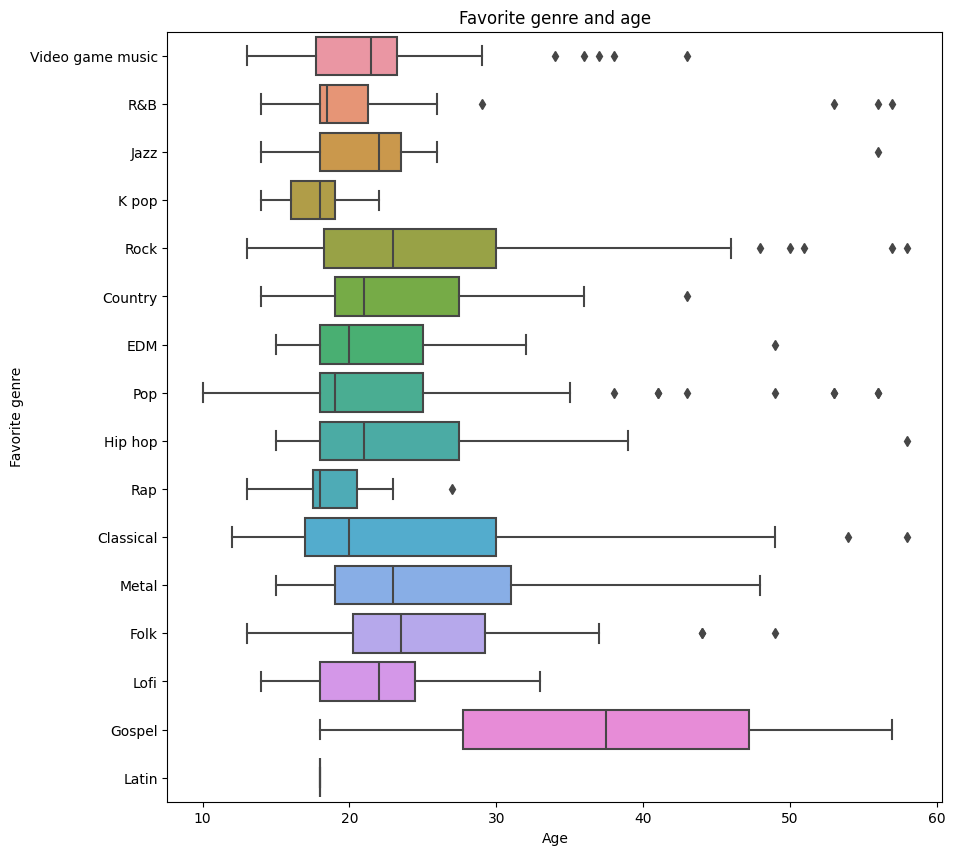

In [23]:
#Vẽ biểu đồ boxplot giữa favorite genres và độ tuổi của tất cả mọi người
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x='Age', y='Fav genre', data=df)
plt.title('Favorite genre and age')
plt.xlabel('Age')
plt.ylabel('Favorite genre')
plt.show()

- Bỏ qua những loại nhạc có quá ít mẫu thì có thể thấy người trẻ thường có sở thích rất đa dạng, trải đều các thể loại nhạc khác nhau. Ngược lại với người lớn tuổi thì sở thích nghe nhạc của họ tập trung vào các thể loại như Rock, Pop, Classical, R&B

Vậy xu hướng thưởng thức âm nhạc của mỗi người có sự khác biệt dựa trên tuổi tác của họ không?
- Đầu tiên, chúng ta hãy xem mọi người có thói quen sáng tác nhạc như một cách hưởng thụ âm nhạc hay không?



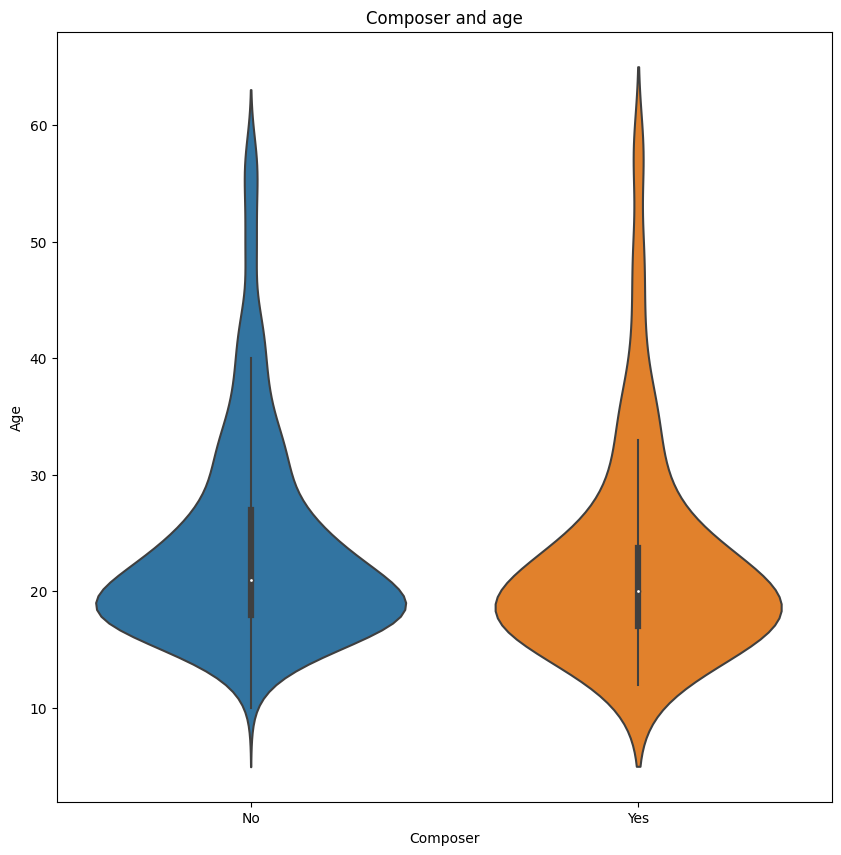

In [24]:
#Vẽ biểu đồ violin plot giữa composer và độ tuổi của tất cả mọi người
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'Composer', y = 'Age', data = df)
plt.title('Composer and age')
plt.ylabel('Age')
plt.xlabel('Composer')
plt.show()

- Tiếp đến, mọi người có thói quen chơi nhạc cụ hay không?

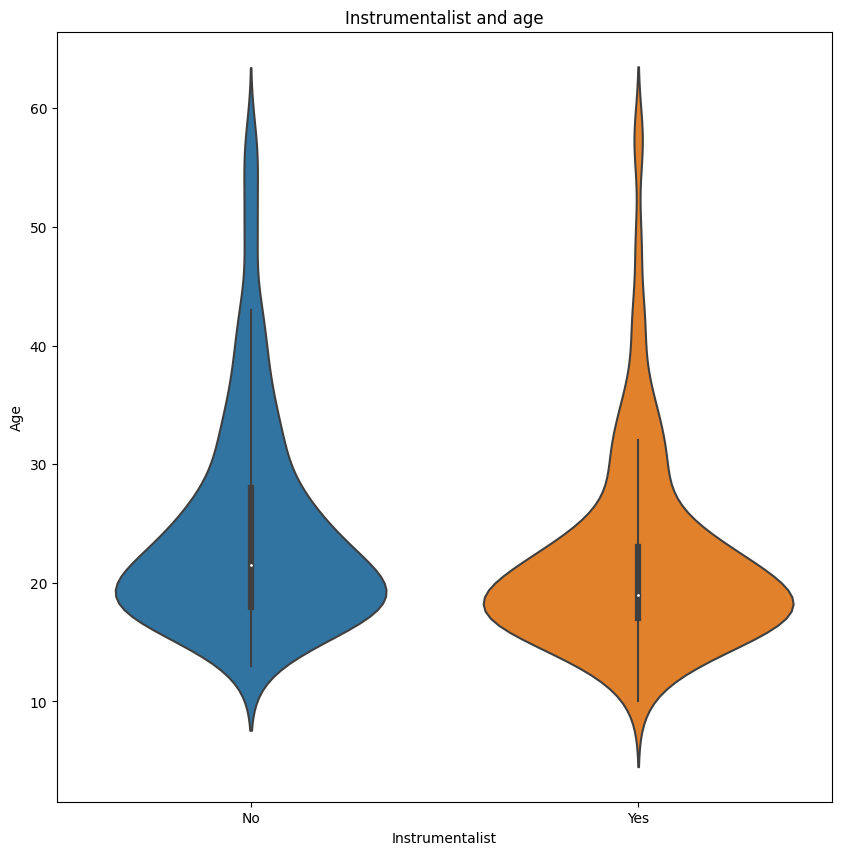

In [25]:
#Vẽ biểu đồ violin plot giữa thói quen chơi nhạc cụ và độ tuổi của tất cả mọi người
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'Instrumentalist', y = 'Age', data = df)
plt.title('Instrumentalist and age')
plt.ylabel('Age')
plt.xlabel('Instrumentalist')
plt.show()

- Họ có nghe nhạc lúc làm việc hay không?

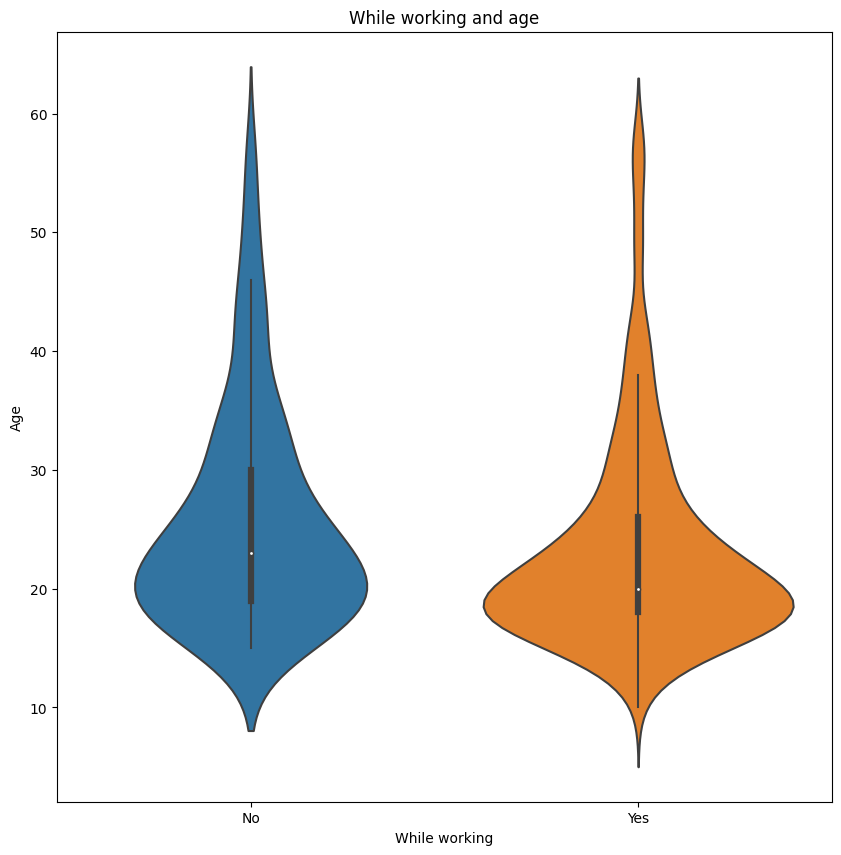

In [26]:
#Vẽ violin plot giữa việc nghe nhạc lúc làm việc và độ tuổi của từng nhóm người trên
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'While working', y = 'Age', data = df)
plt.title('While working and age')
plt.ylabel('Age')
plt.xlabel('While working')
plt.show()

- Qua ba biểu đồ trên, ta có thể thấy được người trẻ sẽ có sáng tác nhạc và chơi nhạc cụ thường xuyên hơn so với người lớn tuổi. và phần lớn mọi người ở bất kì độ tuổi nào thường sẽ có thói quen nghe nhạc trong lúc làm việc.

***Vậy với những thói quen khác nhau như thế này liệu có sự khác biệt giữa sức khỏe tinh thần của mọi người hay không?***

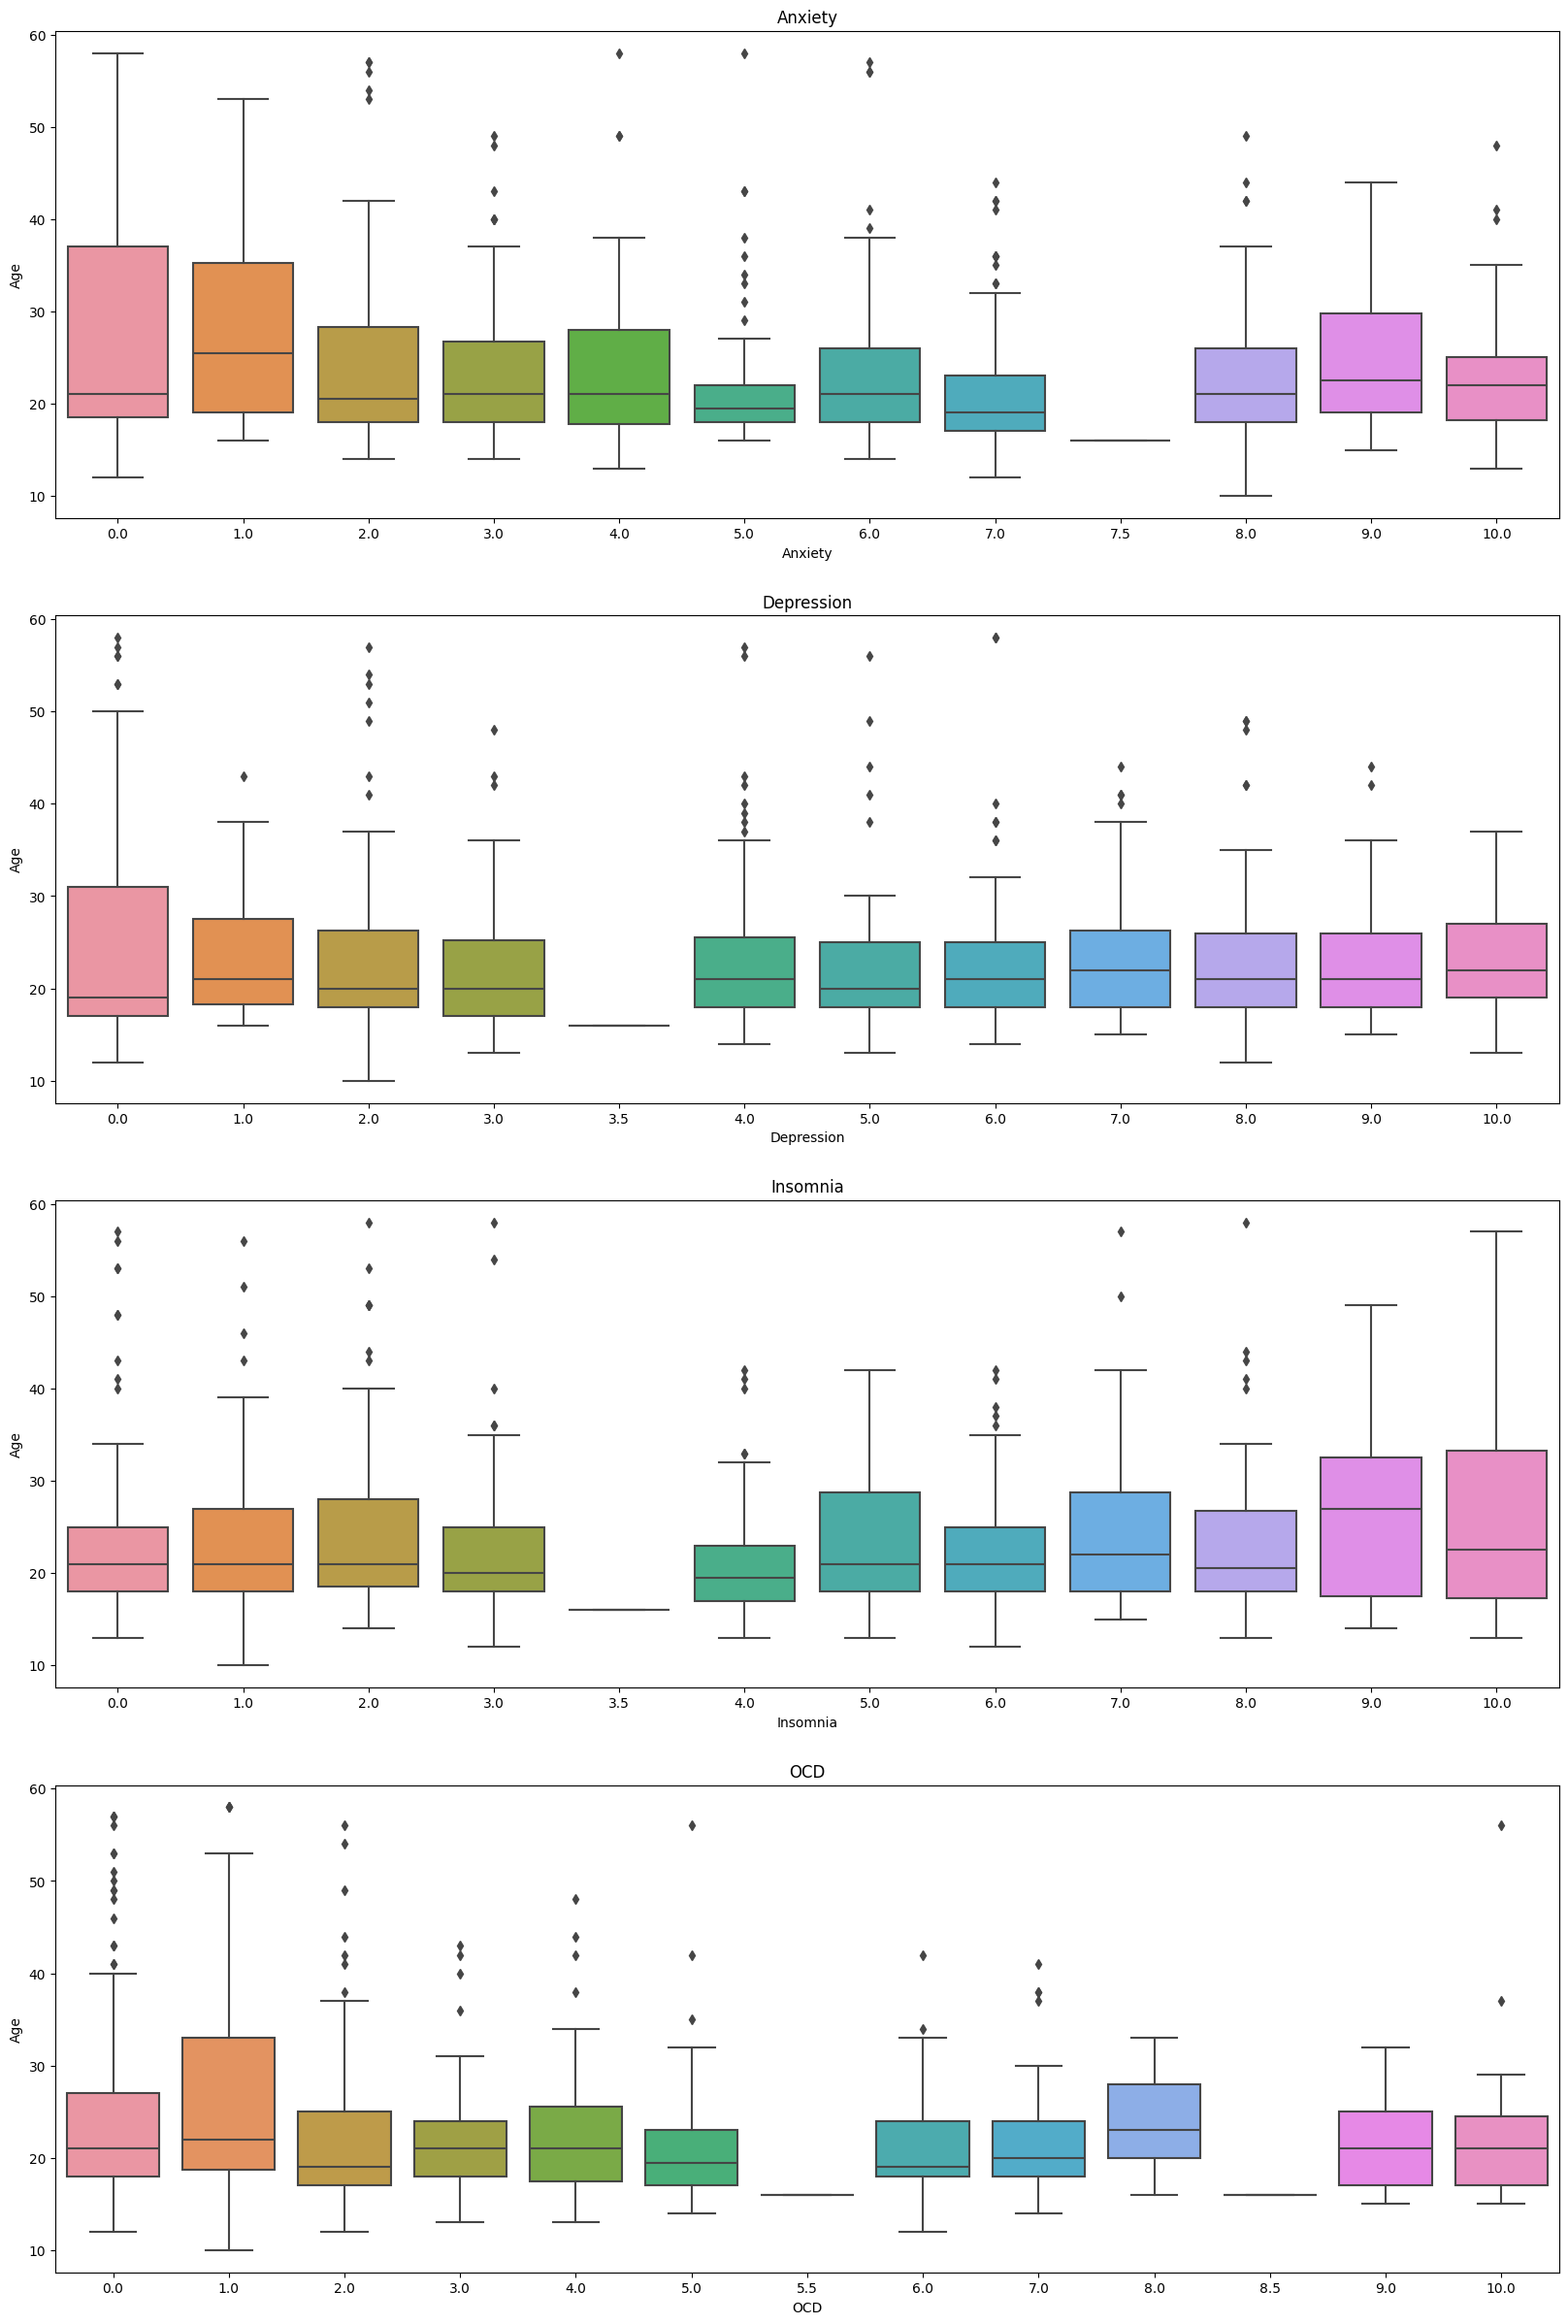

In [27]:
#Anxiety
# plt.figure(figsize = (5, 10))
# plt.scatter(df['Age'], df['Anxiety'])
# plt.title('Anxiety')
# plt.show()
# #Depression
# plt.figure(figsize = (5, 10))
# plt.scatter(df['Age'], df['Depression'])
# plt.title('Depression')
# plt.show()
# #Insomnia
# plt.figure(figsize = (5, 10))
# plt.scatter(df['Age'], df['Insomnia'])
# plt.title('Insomnia')
# plt.show()
# #OCD
# plt.figure(figsize = (5, 10))
# plt.scatter(df['Age'], df['OCD'])
# plt.title('OCD')
# plt.show()
fig, ax = plt.subplots(4, 1, figsize = (20, 30))

# Anxiety
sns.boxplot(x='Anxiety', y='Age', data=df, ax=ax[0])
ax[0].set_title('Anxiety')

# Depression
sns.boxplot(x='Depression', y='Age', data=df, ax=ax[1])
ax[1].set_title('Depression')

# Insomnia
sns.boxplot(x='Insomnia', y='Age', data=df, ax=ax[2])
ax[2].set_title('Insomnia')

# OCD
sns.boxplot(x='OCD', y='Age', data=df, ax=ax[3])
ax[3].set_title('OCD')

plt.show()


- Có thể thấy vì sự chênh lệch số lượng giữa những người trẻ và người lớn tuổi tham gia khảo sát nên không thể khẳng định được, nhưng dựa vào các biểu đồ trên ta có thể thấy người trẻ thường có mức độ bị mắc các vấn đề về tâm lý nặng hơn so với người lớn tuổi. 

- Dựa vào các biểu đồ trên, số lượng người lớn tuổi bị mắc chứng mất ngủ ở mức độ nặng sẽ nhiều hơn so với các vấn đề khác

### Câu 3: Nhịp tim của mỗi người khi nghe dòng nhạc yêu thích có ảnh hưởng tới sức khỏe tinh thần của họ hay không?

In [28]:
df['BPM'].describe()

count    632.000000
mean     121.514241
std       26.857724
min       55.000000
25%      105.000000
50%      120.000000
75%      138.000000
max      192.000000
Name: BPM, dtype: float64

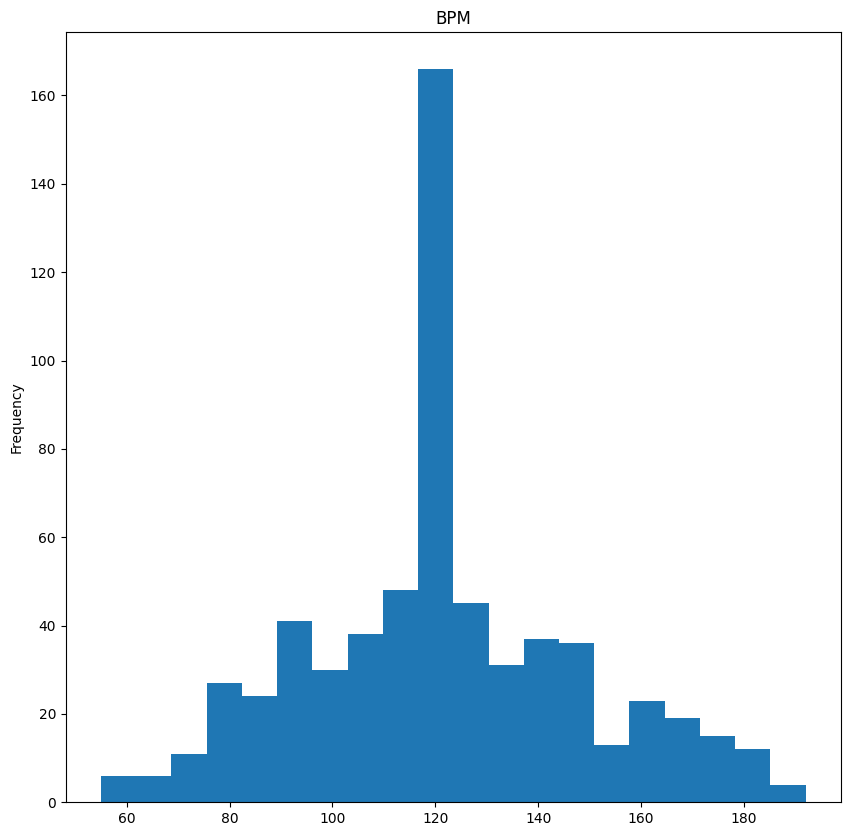

In [29]:
plt.figure(figsize = (10, 10))
df['BPM'].plot(kind = 'hist', bins = 20)
plt.title('BPM')
plt.show()

- Nhịp tim của phần lớn người tham gia khảo sát sẽ rơi vào khoảng 120 nhịp/phút, đây là mức nhịp tim nhanh so với chuẩn của một người trưởng thành 

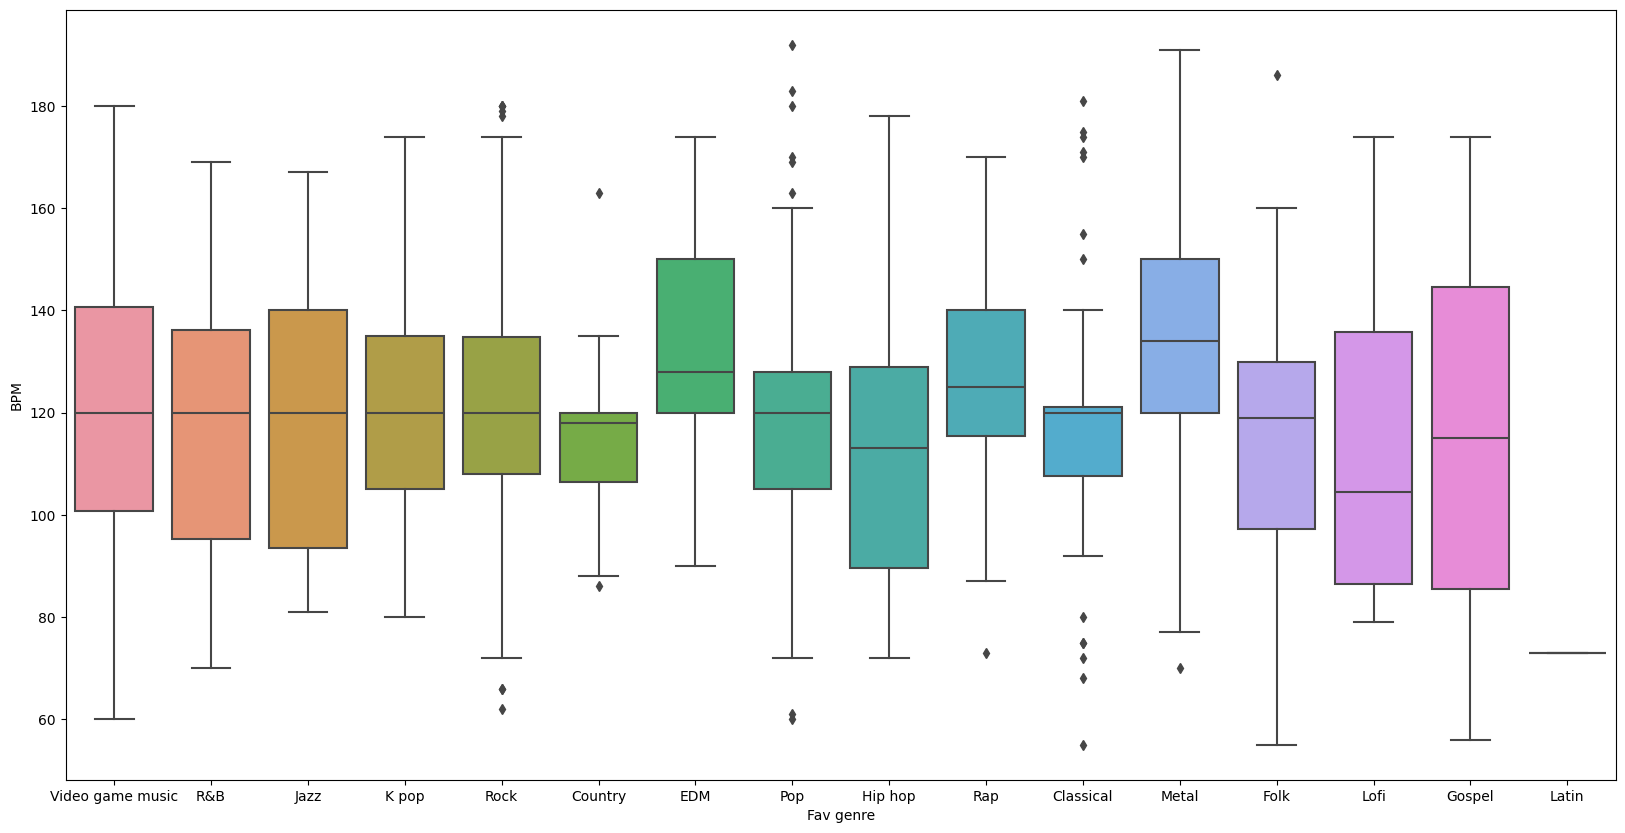

In [30]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='Fav genre', y='BPM', data=df)
plt.show()

- Có thể thấy nhịp tim của những người nghe nhạc EDM, Metal thường sẽ cao hơn so với những người thích nghe các dòng nhạc còn lại. Mặt khác nhịp tim của những người nghe nhạc lofi có xu hướng thấp hơn so với những dòng nhạc khác.

***Vậy nhịp tim có ảnh hưởng tới mức độ các vấn đề tâm lý của người tham gia khảo sát hay không? Liệu những người có nhịp tim cao (> 100) có nguy cơ mắc các vấn đề về tâm lý nặng hơn không?***

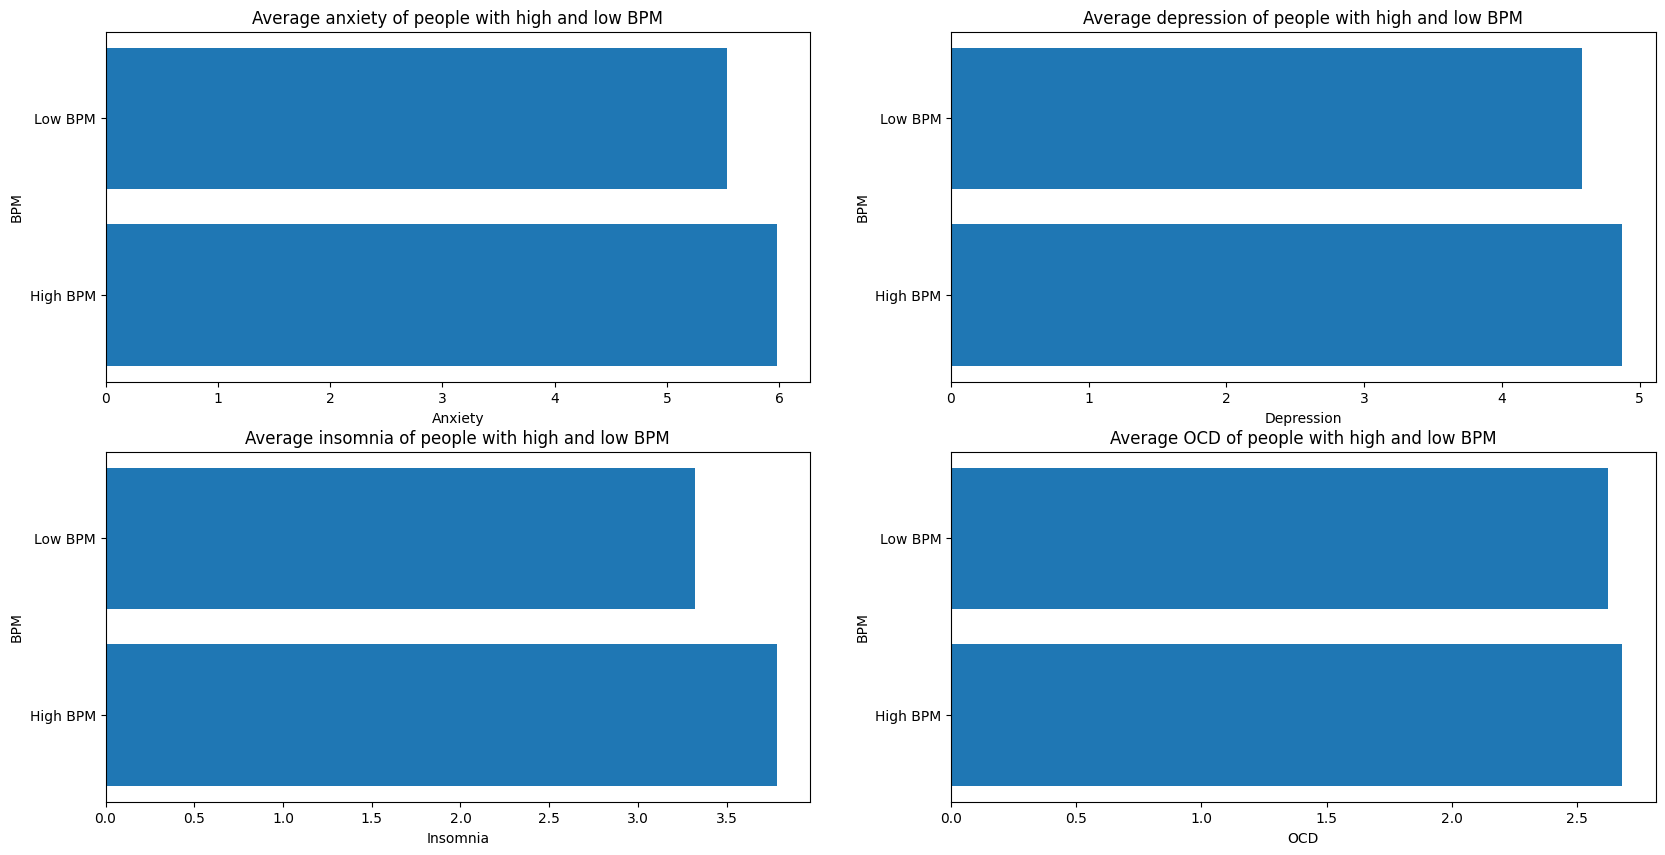

In [31]:
df_high_bpm = df[df['BPM'] > 100]
df_low_bpm = df[df['BPM'] <= 100]
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[0, 0].barh(['High BPM', 'Low BPM'], [df_high_bpm['Anxiety'].mean(), df_low_bpm['Anxiety'].mean()])
ax[0, 0].set_title('Average anxiety of people with high and low BPM')
ax[0, 0].set_xlabel('Anxiety')
ax[0, 0].set_ylabel('BPM')
ax[0, 1].barh(['High BPM', 'Low BPM'], [df_high_bpm['Depression'].mean(), df_low_bpm['Depression'].mean()])
ax[0, 1].set_title('Average depression of people with high and low BPM')
ax[0, 1].set_xlabel('Depression')
ax[0, 1].set_ylabel('BPM')
ax[1, 0].barh(['High BPM', 'Low BPM'], [df_high_bpm['Insomnia'].mean(), df_low_bpm['Insomnia'].mean()])
ax[1, 0].set_title('Average insomnia of people with high and low BPM')
ax[1, 0].set_xlabel('Insomnia')
ax[1, 0].set_ylabel('BPM')
ax[1, 1].barh(['High BPM', 'Low BPM'], [df_high_bpm['OCD'].mean(), df_low_bpm['OCD'].mean()])
ax[1, 1].set_title('Average OCD of people with high and low BPM')
ax[1, 1].set_xlabel('OCD')
ax[1, 1].set_ylabel('BPM')
plt.show()

- Với những người có nhịp tim cao khi nghe dòng nhạc yêu thích thì mức độ về các vấn đề tâm lý của họ thường sẽ nặng hơn so với những người có nhịp tim thấp, nhưng chênh lệch là không quá lớn.

- Thử xem xét độ tương quan giữa nhịp tim và các giá trị này 

In [32]:
df_corr = pd.DataFrame([df['BPM'].corr(df['Anxiety']), df['BPM'].corr(df['Depression']), df['BPM'].corr(df['Insomnia']), df['BPM'].corr(df['OCD'])])
df_corr.index = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
df_corr = df_corr.rename(columns={0: 'Correlation'})
df_corr

,Correlation
Anxiety,0.053067
Depression,0.041486
Insomnia,0.053200
OCD,-0.008225


- Có thể thấy không có mối tương quan, quan hệ nào rõ rệt giữa nhịp tim khi nghe dòng nhạc ưa thích với mức độ nghiêm trọng của các vấn đề tâm lý